LINEAR REGRESSION MULTIPLE VARIATE 

In [33]:
import pandas as pd                                              #IMPORTING LIBARIES AND FUNCTION
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [7]:
data = pd.read_csv("C:/Users/ROG/Desktop/machine learning/Student_Performance.csv").head(100)      #LOADING DATASET
print("\nShape of dataset:", data.shape)
print()
data.head()


Shape of dataset: (100, 10)



,Unnamed: 0,Stu_ID,Atten_Percent,Assig_Sc,Mid_Sc,Final_Sc,Proj_Sc,Parti_Sc,Overall_Sc,Status
0,0,STU202400001,85.93,60.76,70.91,70.90,72.88,72.84,68.86,Pass
1,1,STU202400002,83.58,51.84,75.81,71.52,78.06,80.04,69.29,Pass
2,2,STU202400003,81.84,41.83,38.96,52.38,61.85,71.51,50.39,Pass
3,3,STU202400004,72.28,81.50,83.56,80.49,66.04,76.75,78.81,Pass
4,4,STU202400005,97.48,64.11,84.47,62.98,75.97,88.76,72.09,Pass


In [45]:
                                                                 # Compute correlation between numeric columns
cor_data=data.iloc[:10,2:7]
cor_data.corr()

,Atten_Percent,Assig_Sc,Mid_Sc,Final_Sc,Proj_Sc
Atten_Percent,1.000000,-0.356732,-0.027945,-0.415660,0.470484
Assig_Sc,-0.356732,1.000000,0.573720,0.656799,0.072747
Mid_Sc,-0.027945,0.573720,1.000000,0.870521,0.091049
Final_Sc,-0.415660,0.656799,0.870521,1.000000,-0.052629
Proj_Sc,0.470484,0.072747,0.091049,-0.052629,1.000000


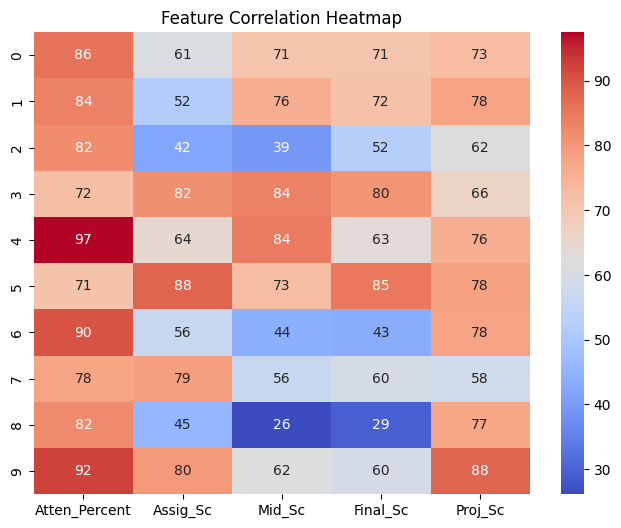

In [46]:
                                                                                        #HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(cor_data, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")                                            #cmap='coolwarm' → color scheme
plt.show()                                                                                    #Blue = negative correlation (-1)
                                                                                    #White = zero correlation (0)
                                                                                    #Red = positive correlation (+1)



FEATURE AND TARGET DEFINING

In [30]:
X = data[['Proj_Sc', 'Atten_Percent']]   # 2 features
y = data['Overall_Sc']       

SPLITING TRAINING AND TESTING DATA SET

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


MODEL CREATION AND TESTING 

In [35]:
                                             # Create model
model = LinearRegression()
                                            # Train model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
y_pred = model.predict(X_test)                #PREDICTING VALUE 


In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Model Coefficients: [0.0588198  0.02086868]
Intercept: 62.68130130103349
Mean Squared Error: 77.58705278207938
R^2 Score: -0.10192554824837519


In [44]:
# Example: Project Score=85, Attendance=90%
new_student = pd.DataFrame([[85, 90]], columns=['Proj_Sc', 'Atten_Percent'])
predicted_score = model.predict(new_student)
print("Predicted Overall Score:", predicted_score[0])


Predicted Overall Score: 69.55916540665213
